<a href="https://colab.research.google.com/github/Acarreno96/Mine/blob/main/Class_4_05_28_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model B is more precises than Model A. Percision is higher in Model B (0.9457) than Model A (0.8916). Recall in Model B is higher than Model A.

When it comes to performance; Model B seems to be more percises/accurate than model A.

Dataset shape: (284807, 31)

Dataset summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2

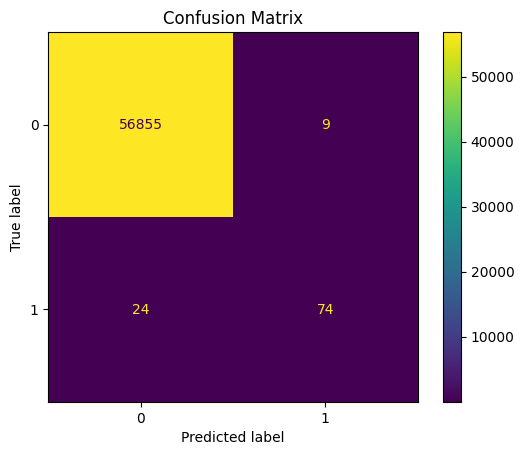

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('creditcard.csv')


print("Dataset shape:", df.shape)
print("\nDataset summary statistics:")
print(df.describe())


print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))


X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth = 5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\nModel Evaluation Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

Precision: 0.9456521739130435
Recall: 0.87
F1 Score: 0.90625
ROC-AUC: 0.9225


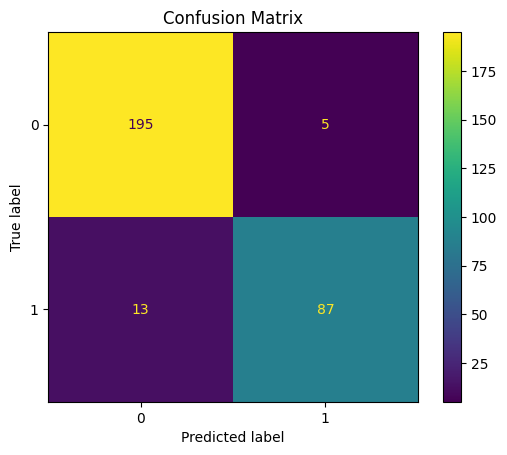

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


np.random.seed(42)
n_samples = 1000


data = pd.DataFrame({
    'amount': np.random.exponential(scale=100, size=n_samples),
    'new_device': np.random.binomial(1, 0.1, size=n_samples),
    'foreign_ip': np.random.binomial(1, 0.05, size=n_samples)
})


data['fraud'] = (
    (data['amount'] > 150) |
    (data['new_device'] == 1) |
    (data['foreign_ip'] == 1)
).astype(int)


noise = np.random.binomial(1, 0.05, size=n_samples)
data['fraud'] = np.where(noise == 1, 1 - data['fraud'], data['fraud'])


X = data[['amount', 'new_device', 'foreign_ip']]
y = data['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(n_estimators=200, random_state=7, max_depth=7)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()